# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
import sys
assert sys.version_info >= (3, 7)

In [4]:
from packaging import version
import sklearn
assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

In [5]:
plt.rc('font', size=12)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=12)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
sns.set_theme(style='ticks')

In [6]:
from pathlib import Path

# Where to save the figures
IMAGES_PATH = Path() / "images"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [7]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [1]:
#reviews

In [9]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | Probably the worst business ...
1,"✅ Trip Verified | Definitely not recommended, ..."
2,✅ Trip Verified | BA shuttle service across t...
3,✅ Trip Verified | I must admit like many other...
4,Not Verified | When will BA update their Busi...


In [10]:
df.to_csv("data/BA_reviews.csv")

## Data preparation

In [11]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
from nltk.text import Text
import string,re

In [12]:
def rm_punc(sntnce):
    return re.sub(r"[^a-zA-Z' ]+", '',sntnce)

In [13]:
def remove_stopword(sentence):
    return [w for w in sentence if not w in stop_words]

In [14]:
for i in range(0,len(reviews)):
    sample = sent_tokenize(reviews[i])
    cleaned = [rm_punc(sentence) for sentence in sample]
    reviews[i] = ". ".join(cleaned)

In [15]:
from nltk.corpus import stopwords
stop_words = list(set(stopwords.words('english')))
print('number of stopwords: ', len(stop_words))
print(f'First 30 stop words:\n{stop_words[:30]}')

number of stopwords:  179
First 30 stop words:
['won', 'll', "haven't", 'but', "wouldn't", 'its', 'at', 'or', 'very', 'of', 'and', 'only', 'until', "you'd", 'under', 'that', 'why', 'was', 'should', 'my', 'during', 'he', "she's", 'be', 'a', 's', 'between', 'this', 'you', 'had']


In [18]:
all_words = []
allowed_wd_types = ["J"]

In [19]:
for i in range(0,len(reviews)):
    sample = sent_tokenize(reviews[i]) #tokenize the review into list of sentences 
    par_review_words = [ word_tokenize(sentence) for sentence in sample] #tokenize sentences into a list of words 
    stopped = [remove_stopword(s) for s in par_review_words] # remove stop words from this list of words
    for j in range(0,len(stopped)): # find adjectives in list of words
        filtered = nltk.pos_tag(stopped[j])
        for word in filtered:
            if word[1][0] in allowed_wd_types:
                all_words.append(word[0].lower())

## Word cloud analysis

In [20]:
all_words = nltk.FreqDist(all_words)

In [21]:
top_words = sorted(all_words, key=all_words.get)[:100]

In [22]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

In [23]:
def generate_wordcloud(words, mask):
    word_cloud = WordCloud(width = 512, height = 512, background_color='white', mask=mask).generate(words)
    plt.figure(figsize=(10,8),facecolor = 'white', edgecolor='blue')
    plt.imshow(word_cloud)
    plt.axis('off')
    plt.tight_layout(pad=0)
    save_fig('top words')
    plt.show()

In [24]:
mask = np.array(Image.open(requests.get("https://www.clker.com/cliparts/7/b/5/0/11949896141346126510aircraft_jarno_vasamaa2.svg.hi.png", stream=True).raw))


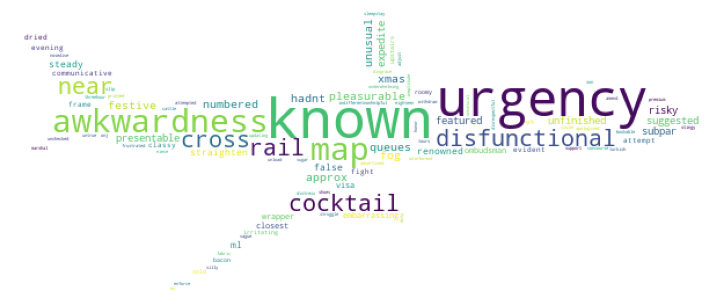

In [25]:
generate_wordcloud(" ".join(top_words),mask)

## Sentiment distribution analysis

In [26]:
from textblob import TextBlob

In [27]:
pos_count = 0
neg_count = 0

In [28]:
threshold = 0

In [29]:
for review in reviews:
    blob = TextBlob(review)
    if blob.sentiment.polarity >= threshold:
        pos_count += 1
    else:
        neg_count += 1
    
    

In [30]:
pos = pos_count * 100/len(reviews)

In [31]:
neg = neg_count * 100/len(reviews)

In [32]:
data = {'reviews': ['positive', 'negative'], 'count':[pos_count,neg_count], 'percent':[pos,neg], 'label':[str(pos)+'%', str(neg)+'%']}
summary = pd.DataFrame(data)
summary

,reviews,count,percent,label
0,positive,679,67.9,67.9%
1,negative,321,32.1,32.1%


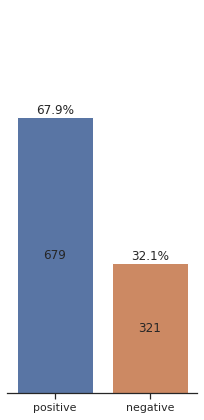

In [33]:
fig2, ax = plt.subplots(figsize=(3,6))
sns.barplot(x="reviews", y="count", data=summary )
ax.set_yticks([x for x in range(0,len(reviews),50)])
for c in ax.containers:
    ax.bar_label(c, label_type='center')
    ax.bar_label(c, labels=summary.label)
    
ax.set_xlabel('')
ax.get_yaxis().set_visible(False)
sns.despine(left=True)
#plt.title('Review distribution for BA (out of 1000 reviews)')
save_fig('distribution')

## References
* <a href="https://towardsdatascience.com/basic-binary-sentiment-analysis-using-nltk-c94ba17ae386"> Basic Sentiment Analysis using NLTK </a>
* <a href="https://towardsdatascience.com/testing-the-waters-with-nltk-3600574f891c"> Testing the waters with NLTK </a>
* <a href="https://blog.goodaudience.com/how-to-generate-a-word-cloud-of-any-shape-in-python-7bce27a55f6e"> Creating custom word cloud </a>
* <a href="https://cbail.github.io/textasdata/"> Text as a data </a>